In [276]:
import numpy as np
import pandas as pd
from KNneighbors import kNearestNeighbor
import random

In [307]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace("?", -99999, inplace=True)
df = df.drop(columns="Sample code number")
df = df.astype(float)
df.head()

,Clump Thickness,Uniformity of Cell SIze,Uniformity of Cell Shape,Marginal Adhession,Single Epethelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [308]:
import numpy as np
from math import sqrt
from collections import Counter

def euclideanDistance(arr1, arr2):
    
    return sqrt( sum( (np.array(arr1)-np.array(arr2) )**2) )

def kNearestNeighbor(data, prediction, k=3):
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = euclideanDistance(features, prediction)
            distances.append([euclidean_distance, group])
    
    votes = []
    for i in sorted(distances)[:k]:
        votes.append(i[1])
    
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

def checkAccuracy(data):
    
    correct = 0
    total = 0
    for group in data:
        for features in data[group]:
            vote = kNearestNeighbor(data, features, k=5)
            if vote == group:
                correct += 1
            total += 1
    
    return correct/total

In [326]:
test_size = 0.2

X = np.array(df.drop(columns="Class"))
random.shuffle(X)
X_train = X[:-int(test_size*len(X))]
X_test = X[-int(test_size*len(X)):]

y = np.array(df["Class"])
y_train = y[:-int(test_size*len(y))]
y_test = y[-int(test_size*len(y)):]

train_set = {}
test_set = {}

for i in range(len(X_train)):
    if y_train[i] not in train_set:
        train_set[y_train[i]] = [np.array(X_train[i], dtype="float64")]
    else:
        train_set[y_train[i]].append(np.array(X_train[i], dtype="float64"))

for i in range(len(X_test)):
    if y_test[i] not in test_set:
        test_set[y_test[i]] = [np.array(X_test[i], dtype="float64")]
    else:
        test_set[y_test[i]].append(np.array(X_test[i], dtype="float64"))
        


In [327]:
# Checking Acuuracy
checkAccuracy(test_set)

0.6839285714285714

In [356]:
dataset = {"k":[[7,6],[5,9],[9,8]],
          "r":[[3,2],[1,3],[2,2]]}
pred = [1,2]

kNearestNeighbor(dataset, pred, k=3)

'r'

In [357]:
checkAccuracy(dataset)

1.0

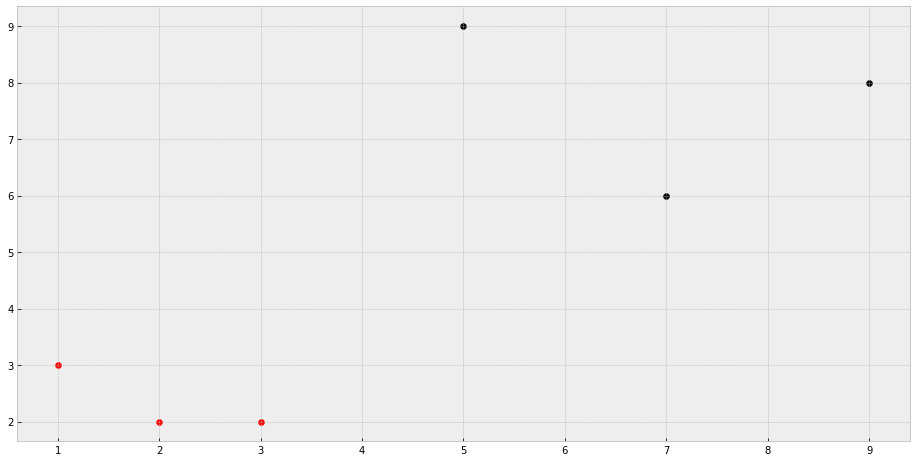

In [358]:
plt.figure(figsize=(16,8))
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1],color=i)
    